In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
hotel_data=pd.read_csv("hotel_bookings.csv",sep=',')

In [29]:
hotel_data.shape

(119390, 32)

In [30]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Possible questions to answer from Kaggle
#### When is the best time of year to book a hotel room?
#### What is the optimal length of stay in order to get the best daily rate?
#### What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

## Column headers

hotel - H1 = Resort Hotel; H2 = City Hotel
is_canceled - Value indicating if the booking was canceled (1) or not (0)
lead_time - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
arrival_date_year - Year of arrival date
arrival_date_month - Month of arrival date
arrival_date_week_number - Week number of year for arrival date
arrival_date_day_of_month - Day of arrival date
stays_in_weekend_nights - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
stays_in_week_nights - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
adults - Number of adults
children - Number of children
babies - Number of babies
meal - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
country - Country of origin. Categories are represented in the ISO 3155–3:2013 format
market_segment - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
distribution_channel - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
is_repeated_guest - Value indicating if the booking name was from a repeated guest (1) or not (0)
previous_cancellations - Number of previous bookings that were cancelled by the customer prior to the current booking
previous_bookings_not_canceled - Number of previous bookings not cancelled by the customer prior to the current booking
reserved_room_type - Code of room type reserved. Code is presented instead of designation for anonymity reasons.
assigned_room_type
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
booking_changes - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
deposit_type - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
agentID of the travel agency that made the booking
companyID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
days_in_waiting_list - Number of days the booking was in the waiting list before it was confirmed to the customer
customer_type
Type of booking, assuming one of four categories:
Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
adr - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
required_car_parking_spaces - Number of car parking spaces required by the customer
total_of_special_requests - Number of special requests made by the customer (e.g. twin bed or high floor)
reservation_status - Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
reservation_status_date - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [31]:
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [32]:
hotel_data.reservation_status_date=pd.to_datetime(hotel_data.reservation_status_date)

In [33]:
hotel_data.hotel=pd.Categorical(hotel_data.hotel)

In [34]:
hotel_data.dtypes

hotel                                   category
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

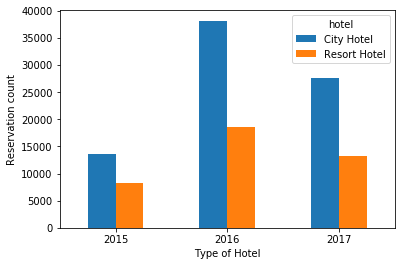

In [35]:
hotel_data.groupby('hotel').arrival_date_year.value_counts().unstack(0).plot.bar()
plt.ylabel("Reservation count")
plt.xlabel("Type of Hotel")
plt.xticks(rotation=0)
plt.show()

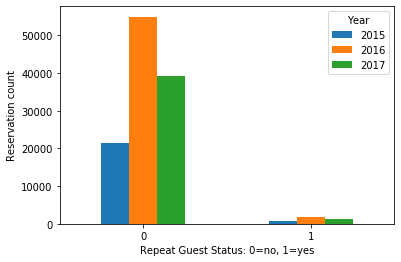

In [36]:
hotel_data.groupby('arrival_date_year').is_repeated_guest.value_counts().unstack(0).plot.bar()
plt.ylabel("Reservation count")
plt.xlabel("Repeat Guest Status: 0=no, 1=yes")
plt.legend(title="Year")
plt.xticks(rotation=0)
plt.show()

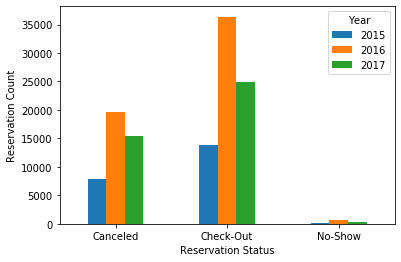

In [37]:
hotel_data.groupby('arrival_date_year').reservation_status.value_counts().unstack(0).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Reservation Status")
plt.ylabel("Reservation Count")
plt.legend(title="Year")

plt.show()

### Since 2016 seems to be the only year with complete data, we will make a subset of the data for only 2016 arrivals to get an idea of prices throughout the year.

In [41]:
hotel_data_2016=hotel_data[hotel_data['arrival_date_year']==2016]

In [42]:
hotel_data_2016

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3738,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,No Deposit,240.0,NaN,0,Transient-Party,59.94,0,1,Check-Out,2016-01-02
3739,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,No Deposit,240.0,NaN,0,Transient-Party,116.10,1,1,Check-Out,2016-01-02
3740,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,No Deposit,240.0,NaN,0,Transient,89.00,0,1,No-Show,2016-01-01
3741,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,No Deposit,241.0,NaN,0,Transient,73.46,0,2,Check-Out,2016-01-03
3742,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,119.00,0,0,Canceled,2015-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104142,City Hotel,0,17,2016,December,53,30,2,5,2,...,No Deposit,9.0,NaN,0,Transient,90.34,0,1,Check-Out,2017-01-06
104145,City Hotel,0,177,2016,December,53,30,2,5,0,...,No Deposit,NaN,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06
104147,City Hotel,0,107,2016,December,53,31,2,5,2,...,No Deposit,28.0,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07
104216,City Hotel,0,310,2016,December,53,27,2,10,2,...,No Deposit,9.0,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08
